In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/02


In [2]:

#---------------------------------------------------------------------
#TEST USING QUANTILE REGRESSION ON EB/EE DATA SEPARATELY AND UNIFIED AFTERWARDS, WITH AND WITHOUT WEIGHTS
#---------------------------------------------------------------------


In [3]:
# Variable you want to correct
ylist = ["R9"]#, "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']#, "SigmaRR", 'PhoIso03', 'ChIso03', 'ChIso03worst']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [ ]:
# Upload Dataframes- mc have already a fake run period
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5", 0, -1)
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Final.h5", 0, -1)
dfdata= qr_data.getDF() 
qr_mc1NoTime= quantileRegression("mc")
qr_mc2NoTime= quantileRegression("mc")
qr_dataNoTime= quantileRegression("data")
qr_mc1NoTime.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_NoTime.h5", 0, -1)
qr_mc2NoTime.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_NoTime.h5", 0, -1)
qr_dataNoTime.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_NoTime.h5", 0, -1)
dfdataNoTime= qr_dataNoTime.getDF() 

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5
Selecting events   [ 0 ,  9554789 ]  out of  9554789
number of events: 9554789
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5
Selecting events   [ 0 ,  9554789 ]  out of  9554789
number of events: 9554789
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Final.h5
Selecting events   [ 0 ,  21216525 ]  out of  21216525
number of events: 21216525
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_NoTime.h5
Selecting events   [ 0 ,  7681021 ]  out of  7681021
number of events: 7681021
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_NoTime.h5
Selecting events   [ 0 ,  7681021 ]  out of  7681021
number of events: 7681021
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_NoTime.h5
Selecting events   [ 0 ,  7422503 ]  out of  7422503
number o

In [ ]:
qr_mc1.correctAll(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_") 
qr_mc2.correctAll(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_") 
qr_mc1NoTime.correctAllY(X, ylist, quantiles,EBEE="EB", relativePath= "weights_NoTime") 
qr_mc2NoTime.correctAllY(X, ylist, quantiles,EBEE="EE", relativePath= "weights_NoTime") 

Loading corrected targets from :  correctedTargetsweights_Period_1_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_1_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EE.h5
Loading corrected targets from :  correctedTargetsweights_NoTime_EB.h5
Loading corrected targets from :  correctedTargetsweights_NoTime_EE.h5


In [ ]:
dfmcEB= qr_mc1.df
dfmcEE= qr_mc2.df 
dfdataEB = dfdata.query('-1.444 < ScEta & ScEta <1.444') # ('abs(ScEta)<1.444')
dfdataEE = dfdata.query('ScEta < -1.57 | ScEta >1.57  ') # ('abs(ScEta)>1.57')
dfmcEBNoTime= qr_mc1NoTime.df
dfmcEENoTime= qr_mc2NoTime.df 
dfdataEBNoTime = dfdataNoTime.query('-1.444 < ScEta & ScEta <1.444') # ('abs(ScEta)<1.444')
dfdataEENoTime = dfdataNoTime.query('ScEta < -1.57 | ScEta >1.57  ') # ('abs(ScEta)>1.57')

['R9']
plotting  R9


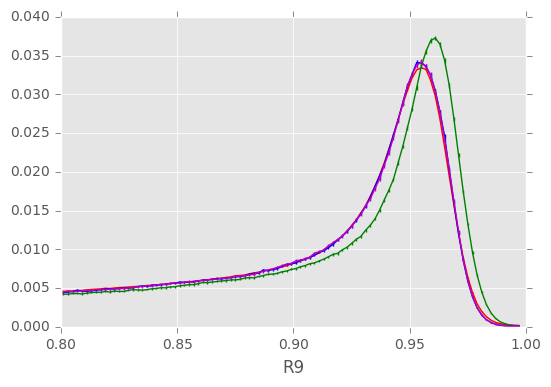

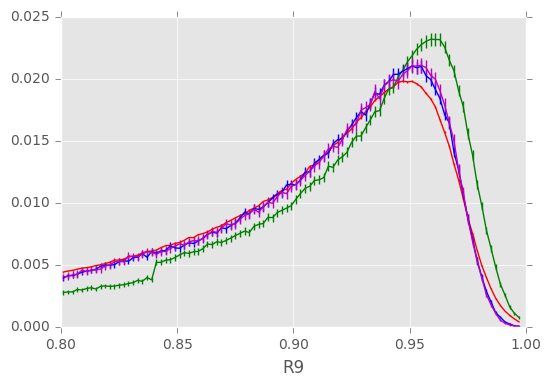

In [ ]:

print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    rv  = np.arange(0.8,1.0,0.002)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    plot.plotHistErr(dfdataEB[yvar], rv, Color="r", Weight=dfdataEB["weight"])
    plot.plotHistErr(dfmcEB[yvar], rv,Weight=dfmcEB["weight"], Color="g")  
    plot.plotHistErr(dfmcEB[yvar+"_corr"], rv,Weight=dfmcEB["weight"], Color="b")
    plot.plotHistErr(dfmcEBNoTime[yvar+"_corr"], rv,Weight=dfmcEBNoTime["weight"], Color="m")
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    plot.plotHistErr(dfdataEE[yvar], rv, Color="r", Weight=dfdataEE["weight"])
    plot.plotHistErr(dfmcEE[yvar], rv,Weight=dfmcEE["weight"], Color="g")  
    plot.plotHistErr(dfmcEE[yvar+"_corr"], rv,Weight=dfmcEE["weight"], Color="b")
    plot.plotHistErr(dfmcEENoTime[yvar+"_corr"], rv,Weight=dfmcEENoTime["weight"], Color="m")
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    

plotting  R9
plotting  R9
plotting  R9
plotting  R9
plotting  R9


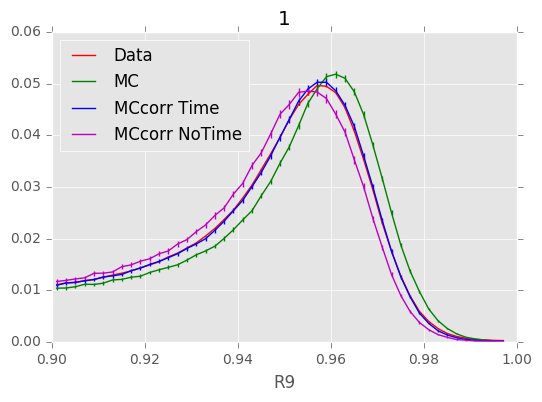

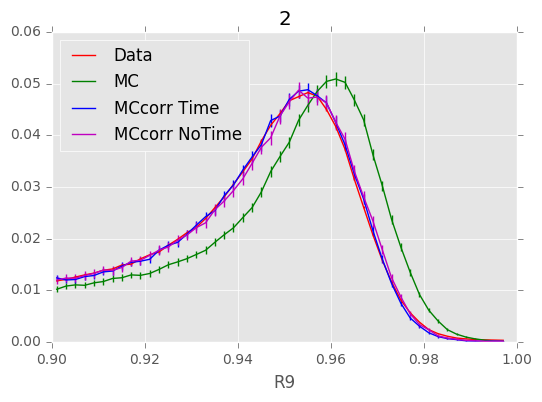

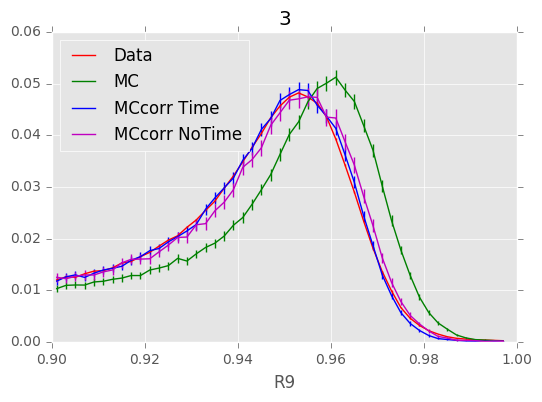

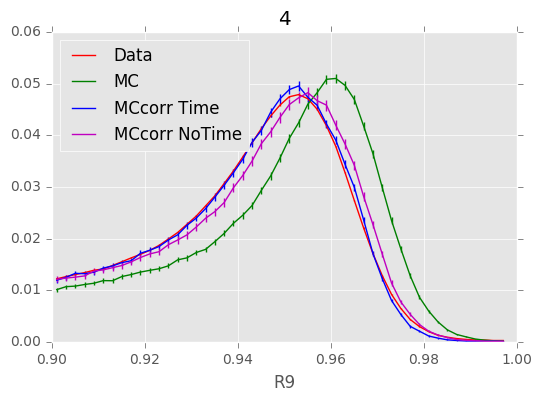

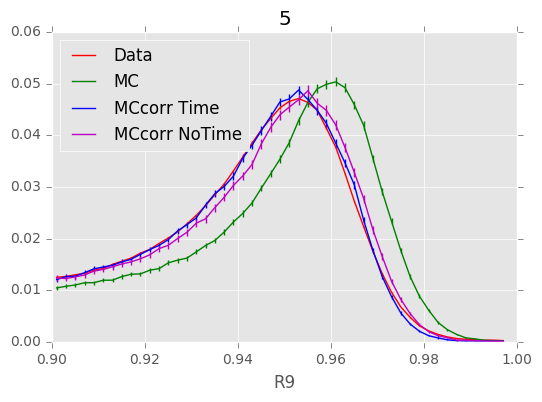

In [13]:
import matplotlib.lines as mlines
for runperiod in [1,2,3,4,5]:
    yvar="R9"
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    rv  = np.arange(0.9,1.0,0.002)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    plot.plotHistErr(dfdataEB.query("runperiod=="+str(runperiod))[yvar], rv, Color="r", Weight=dfdataEB.query("runperiod=="+str(runperiod))["weight"])
    plot.plotHistErr(dfmcEB.query("runperiod=="+str(runperiod))[yvar], rv,Weight=dfmcEB.query("runperiod=="+str(runperiod))["weight"], Color="g")  
    plot.plotHistErr(dfmcEB.query("runperiod=="+str(runperiod))[yvar+"_corr"], rv,Weight=dfmcEB.query("runperiod=="+str(runperiod))["weight"], Color="b")
    plot.plotHistErr(dfmcEBNoTime.query("runperiod=="+str(runperiod))[yvar+"_corr"], rv,Weight=dfmcEBNoTime.query("runperiod=="+str(runperiod))["weight"], Color="m")
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    ax.set_title(str(runperiod))
    red_line = mlines.Line2D([], [], color='red',markersize=15, label='Data')
    green_line = mlines.Line2D([], [], color='green', markersize=15, label='MC')
    blue_line = mlines.Line2D([], [], color='blue', markersize=15, label='MCcorr Time')
    mag_line = mlines.Line2D([], [], color='m', markersize=15, label='MCcorr NoTime')
    ax.legend(handles=[red_line,green_line, blue_line,mag_line], loc=2)
    fig.savefig('FINALPLOTS/TimeDist'+str(runperiod)+'.png', dpi=fig.dpi)
    

plotting  R9
plotting  R9
plotting  R9
plotting  R9
plotting  R9


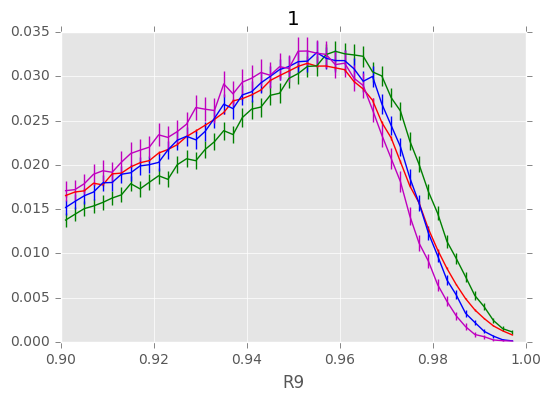

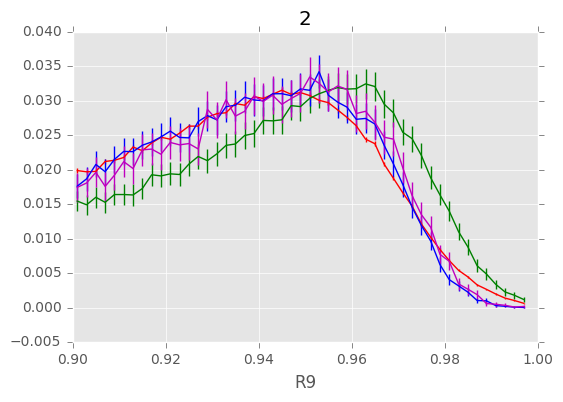

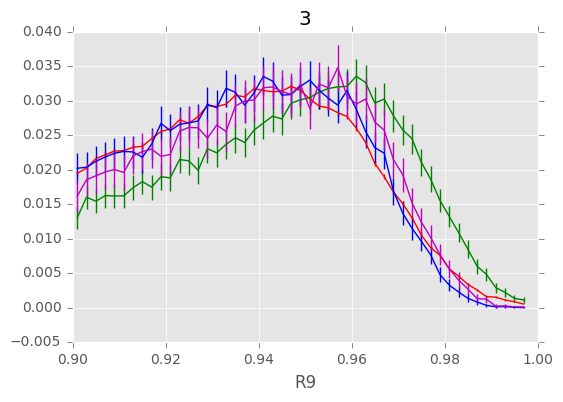

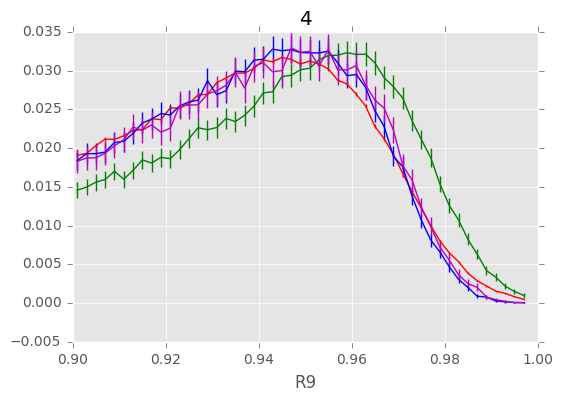

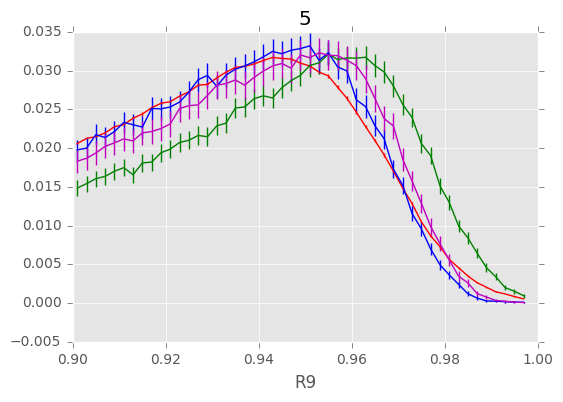

In [ ]:
for runperiod in [1,2,3,4,5]:
    yvar="R9"
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    rv  = np.arange(0.9,1.0,0.002)
    fig = plt.figure(dpi=400)
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    plot.plotHistErr(dfdataEE.query("runperiod=="+str(runperiod))[yvar], rv, Color="r", Weight=dfdataEE.query("runperiod=="+str(runperiod))["weight"])
    plot.plotHistErr(dfmcEE.query("runperiod=="+str(runperiod))[yvar], rv,Weight=dfmcEE.query("runperiod=="+str(runperiod))["weight"], Color="g")  
    plot.plotHistErr(dfmcEE.query("runperiod=="+str(runperiod))[yvar+"_corr"], rv,Weight=dfmcEE.query("runperiod=="+str(runperiod))["weight"], Color="b")
    plot.plotHistErr(dfmcEENoTime.query("runperiod=="+str(runperiod))[yvar+"_corr"], rv,Weight=dfmcEENoTime.query("runperiod=="+str(runperiod))["weight"], Color="m")
    ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
    ax.set_title(str(runperiod))
    

In [ ]:
dm=dfmcEB.query("R9>0.7&R9<1").sample(n=100000).reset_index(drop=True)
dd=dfdataEB.query("R9>0.7&R9<1").sample(n=100000).reset_index(drop=True)
dm1=dfmcEBNoTime.query("R9>0.7&R9<1").sample(n=100000).reset_index(drop=True)
binsEta = np.linspace(-1.57,1.57, 15)
binsPt = np.linspace(25,80,15)
z1= [ [ 0 for i in range(14) ] for j in range(14) ]
z2= [ [ 0 for i in range(14) ] for j in range(14) ]
for x in range(14): 
    for y in range(14):
        a=dm.query("Pt>"+str(binsPt[y])+"& Pt<"+str(binsPt[y+1])+"& ScEta>"+str(binsEta[x])+"& ScEta<"+str(binsEta[x+1]))["R9_corr"].median()
        b=dm1.query("Pt>"+str(binsPt[y])+"& Pt<"+str(binsPt[y+1])+"& ScEta>"+str(binsEta[x])+"& ScEta<"+str(binsEta[x+1]))["R9_corr"].median()
        c=dd.query("Pt>"+str(binsPt[y])+"& Pt<"+str(binsPt[y+1])+"& ScEta>"+str(binsEta[x])+"& ScEta<"+str(binsEta[x+1]))["R9"].median()
        z1[y][x]=a/c
        z2[y][x]=b/c


In [ ]:
#Plot it
plt.imshow(z1,vmin=0.95,vmax=1.05, origin='lower',
           extent=[binsEta.min(), binsEta.max(), binsPt.min(), binsPt.max()],aspect="auto",interpolation="nearest")
plt.colorbar()
plt.xlabel("Eta")
plt.ylabel("Pt")
plt.show()
plt.imshow(z2,vmin=0.95,vmax=1.05,origin='lower',
           extent=[binsEta.min(), binsEta.max(), binsPt.min(), binsPt.max()],aspect="auto",interpolation="nearest")
plt.colorbar()
plt.xlabel("Eta")
plt.ylabel("Pt")
plt.show()

In [ ]:
z3= [ [ 0 for i in range(14) ] for j in range(14) ]
for x in range(14): 
    for y in range(14):
        z3[y][x]=z2[y][x]/z1[y][x]
        
plt.imshow(z3,vmin=0.93,vmax=1.08,origin='lower',
           extent=[binsEta.min(), binsEta.max(), binsPt.min(), binsPt.max()],aspect="auto",interpolation="nearest")
plt.colorbar()
plt.xlabel("Eta")
plt.ylabel("Pt")
plt.show()

In [ ]:
#for runperiod 1
dm=dfmcEB.query("runperiod==1&R9>0.7&R9<1").sample(n=100000).reset_index(drop=True)
dd=dfdataEB.query("runperiod==1&R9>0.7&R9<1").sample(n=100000).reset_index(drop=True)
dm1=dfmcEBNoTime.query("runperiod==1&R9>0.7&R9<1").sample(n=100000).reset_index(drop=True)
binsEta = np.linspace(-1.57,1.57, 15)
binsPt = np.linspace(25,80,15)
z1= [ [ 0 for i in range(14) ] for j in range(14) ]
z2= [ [ 0 for i in range(14) ] for j in range(14) ]
for x in range(14): 
    for y in range(14):
        a=dm.query("Pt>"+str(binsPt[y])+"& Pt<"+str(binsPt[y+1])+"& ScEta>"+str(binsEta[x])+"& ScEta<"+str(binsEta[x+1]))["R9_corr"].median()
        b=dm1.query("Pt>"+str(binsPt[y])+"& Pt<"+str(binsPt[y+1])+"& ScEta>"+str(binsEta[x])+"& ScEta<"+str(binsEta[x+1]))["R9_corr"].median()
        c=dd.query("Pt>"+str(binsPt[y])+"& Pt<"+str(binsPt[y+1])+"& ScEta>"+str(binsEta[x])+"& ScEta<"+str(binsEta[x+1]))["R9"].median()
        z1[y][x]=a/c
        z2[y][x]=b/c


In [ ]:
#Plot it
plt.imshow(z1,vmin=0.95,vmax=1.05,origin='lower',
           extent=[binsEta.min(), binsEta.max(), binsPt.min(), binsPt.max()],aspect="auto",interpolation="nearest")
plt.colorbar()
plt.xlabel("Eta")
plt.ylabel("Pt")
plt.show()
plt.imshow(z2,vmin=0.95,vmax=1.05,origin='lower',
           extent=[binsEta.min(), binsEta.max(), binsPt.min(), binsPt.max()],aspect="auto",interpolation="nearest")
plt.colorbar()
plt.xlabel("Eta")
plt.ylabel("Pt")
plt.show()

In [ ]:
z3= [ [ 0 for i in range(14) ] for j in range(14) ]
for x in range(14): 
    for y in range(14):
        z3[y][x]=z2[y][x]/z1[y][x]
        
plt.imshow(z3,vmin=0.93,vmax=1.08,origin='lower',
           extent=[binsEta.min(), binsEta.max(), binsPt.min(), binsPt.max()],aspect="auto",interpolation="nearest")
plt.colorbar()
plt.xlabel("Eta")
plt.ylabel("Pt")
plt.show()